In [1]:
import sys
import os


notebook_path = os.getcwd()
module_path = os.path.join(notebook_path, '..')
# add your Confocal_GUI directory path 

sys.path.append(module_path)

from confocal_gui.live_plot import ple, pl, live, change_to_inline, \
change_to_nbagg, enable_long_output, ple_with_animation, live_with_animation, odmr
from confocal_gui.logic import LaserStabilizer, VirtualLaserStabilizerCore
from confocal_gui.virtual_device import VirtualScanner, virtual_read_counts
#from confocal_gui.device import DSG836, USB6346
from confocal_gui.device import initialize_classes
# define your device in confocal_gui/device.py
from confocal_gui.gui import GUI
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2

In [2]:
# initialize all classes and functions, bind them to devices wanted

enable_long_output()
# make sure that GUI() can output fig to jupyter notebook cell without being scrolled

config = {
    
    "scanner": {
        "type": "VirtualScanner",
    },
    
    "counter": {
        "type": "virtual_read_counts",
    },
    
    "laser_stabilizer_core": {
        "type": "VirtualLaserStabilizerCore",
        'config_instances':'config_instances'
    },
    
    "laser_stabilizer": {
        "type": "LaserStabilizer",
        'config_instances':'config_instances'
    },
    
    
}
# scanner, counter, laser_stabilizer_core, laser_stabilizer, wavemeter, laser etc. 
# are default keys for all functions to call objetive, 'type' defines bind which class
# or function to the key.


config_instances = initialize_classes(config, lookup_dict=globals())
config_instances = {**config_instances, **{'display_scale':1}}

scanner => <confocal_gui.virtual_device.VirtualScanner object at 0x000001EBDD0FF5C8>
counter => <function virtual_read_counts at 0x000001EBDD12D1F8>
laser_stabilizer_core => <confocal_gui.logic.VirtualLaserStabilizerCore object at 0x000001EBF65DB2C8>
laser_stabilizer => <LaserStabilizer(Thread-8, initial daemon)>


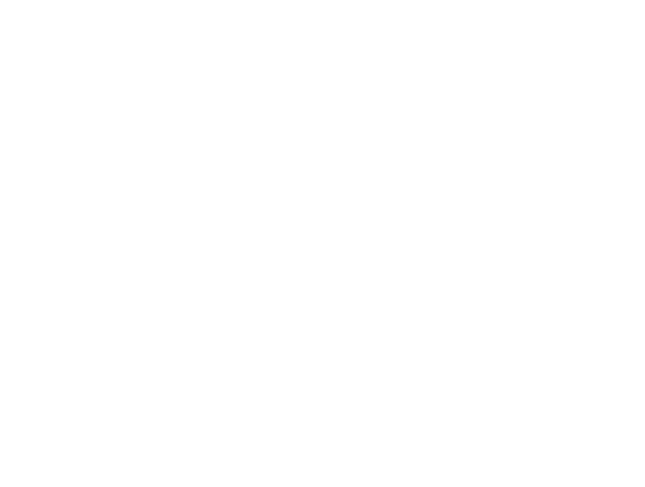

In [3]:
import time
ple_test_dict = {'ple_height':100000, 'ple_width':0.001, 'ple_center':737.102}
# defines ple_test_dict for testing purpose only
t0 = time.time()
fig, data_figure = ple(np.arange(737.1-0.005, 737.1+0.005, 0.0005), exposure=0.1, \
                                config_instances={**config_instances, **ple_test_dict}, repeat=10)

In [4]:
from IPython.display import display, Javascript
import atexit
def say():
    print('sb')
            
    js_code = """
    Jupyter.notebook.save_notebook();
    Jupyter.notebook.save_checkpoint();
    """
    display(Javascript(js_code))
    
    data_figure.save('sb')
atexit.register(say)

<function __main__.say()>

In [5]:
np.arange(737.1-0.005, 737.1+0.005, 0.0005)

array([737.095 , 737.0955, 737.096 , 737.0965, 737.097 , 737.0975,
       737.098 , 737.0985, 737.099 , 737.0995, 737.1   , 737.1005,
       737.101 , 737.1015, 737.102 , 737.1025, 737.103 , 737.1035,
       737.104 , 737.1045])

In [5]:
# use mouse left to select/cancel area in fig
# use mouse middle to scroll range
# use mouse right to select point, or double clicks to remove point

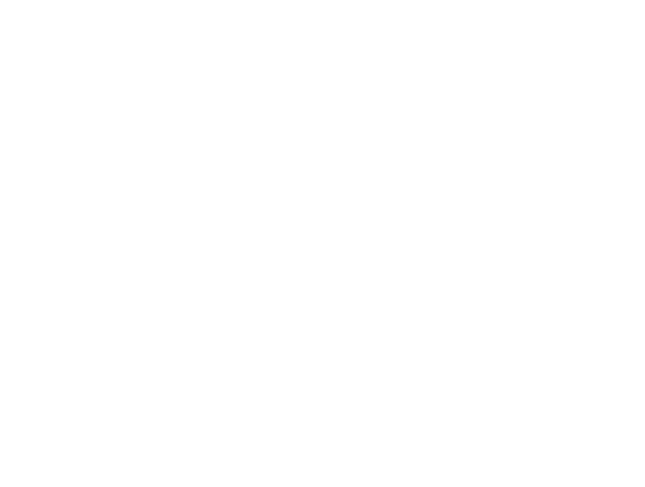

In [4]:
ple_test_dict = {'ple_height':100000, 'ple_width':0.001, 'ple_center':737.102}
# defines ple_test_dict for testing purpose only
fig2, data_figure = ple(np.arange(737.1-0.005, 737.1+0.005, 0.0005), exposure=0.1, \
                                config_instances={**config_instances, **ple_test_dict})

In [8]:
data_figure.data
# get data from return data_figure
# data_figure is a instance of DataFigure 
# defines in confocal_gui.live_plot

[array([737.095 , 737.0955, 737.096 , 737.0965, 737.097 , 737.0975,
        737.098 , 737.0985, 737.099 , 737.0995, 737.1   , 737.1005,
        737.101 , 737.1015, 737.102 , 737.1025, 737.103 , 737.1035,
        737.104 , 737.1045]),
 array([  44.,   51.,   81.,   91.,   84.,  121.,  165.,  194.,  283.,
         358.,  579.,  978., 1997., 5000., 9973., 5065., 2019.,  991.,
         579.,  398.])]

In [24]:
data_figure.lorent()
# call lorent() to get a lorentzian fit

In [10]:
data_figure.info

{'data_generator': 'PLEAcquire', 'exposure': 0.1, 'scanner': [0, 0]}

In [10]:
data_figure.save()
# save figure 

saved fig as PLE2024_06_28_01_59_15.npz


In [19]:
loaded = np.load('PLE2024_06_28_01_59_15.npz', allow_pickle=True)
keys = loaded.files
print("Keys in npz file:", keys)

for key in keys:
    print(f"Data under key '{key}':")
    print(loaded[key])

Keys in npz file: ['data_x', 'data_y', 'info']
Data under key 'data_x':
[737.095  737.0955 737.096  737.0965 737.097  737.0975 737.098  737.0985
 737.099  737.0995 737.1    737.1005 737.101  737.1015 737.102  737.1025
 737.103  737.1035 737.104  737.1045]
Data under key 'data_y':
[  42.   59.   60.   71.   85.  129.  145.  198.  271.  372.  577. 1032.
 2001. 4948. 9958. 4979. 1947.  976.  601.  415.]
Data under key 'info':
{'data_generator': 'PLEAcquire', 'exposure': 0.1, 'scanner': [0, 0]}


In [13]:
help(pl)

Help on function pl in module confocal_gui.live_plot:

pl(
    center,
    coordinates_x,
    coordinates_y,
    exposure,
    config_instances,
    is_dis=False,
    wavelength=None
)
    example

    >>> pl(center=[0, 0], coordinates_x=np.linspace(-5,5,10),         coordinates_y=np.linspace(-5,5,10), exposure=0.2)



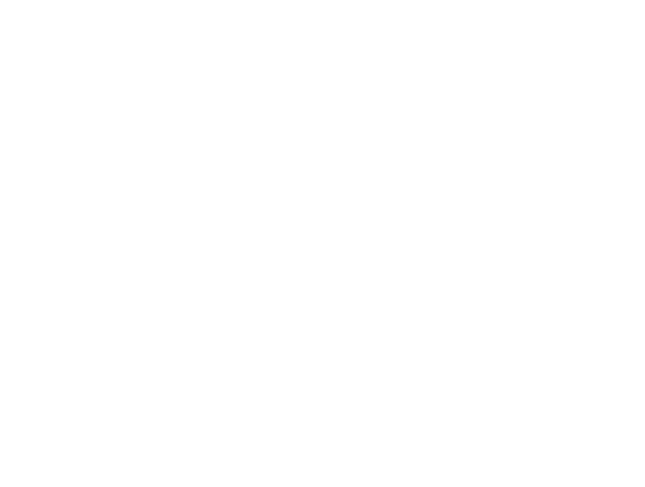

In [14]:
pl_test_dict = {'pl_height':10000, 'pl_width':4, 'pl_center':[5, -5], 'pl_bg':5000}
# defines pl_test_dict for testing purpose only
fig, data_figure = pl(center=[0,0], coordinates_x=np.arange(-20,20,1), \
                               coordinates_y=np.arange(-20,20,1), exposure=0.025, \
                               config_instances={**config_instances, **pl_test_dict})

In [ ]:
# can be interrupted by interrupt

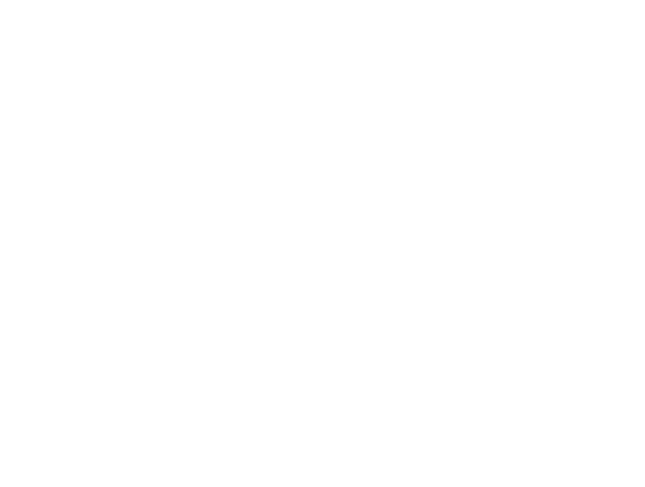

In [6]:
pl_test_dict = {'pl_height':10000, 'pl_width':4, 'pl_center':[5, -5], 'pl_bg':5000}
fig, data_figure = pl(center=[0,0], coordinates_x=np.arange(-20,20,1), \
                               coordinates_y=np.arange(-20,20,1), exposure=0.025, is_dis=True,\
                               wavelength = 2, config_instances={**config_instances, **pl_test_dict})

In [ ]:
# drag two vertical lines in histogram to reset colorbar
# enables remove background

In [12]:
help(live)

Help on function live in module confocal_gui.live_plot:

live(data_array, exposure, config_instances, wavelength=None, is_finite=False)



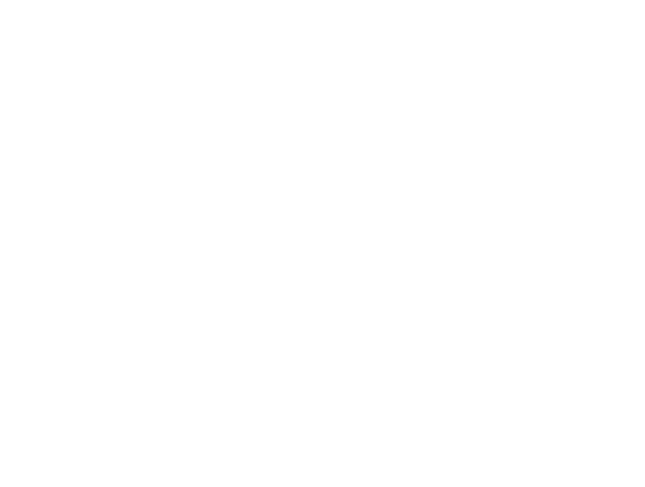

In [7]:
fig, data_figure = live(np.arange(100), exposure=0.01, wavelength=None, 
                                           is_finite=False, config_instances={**config_instances, **pl_test_dict})
# wavelength defines wavelength for live plot

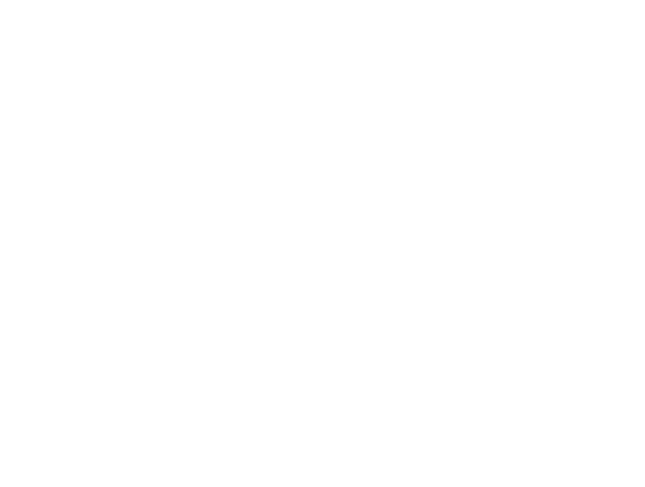

In [8]:
fig, data_figure = live(np.arange(100), exposure=0.1, config_instances={**config_instances, **pl_test_dict})

In [3]:
help(GUI)

Help on function GUI in module confocal_gui.gui:

GUI(config_instances)
    The function opens pyqt GUI for PLE, PL, live counts, and pulse control.
    Save button will also output data and figure to jupyter notebook.
    
    Examples
    --------
    >>> GUI()
    
    Read range button reads range from area created by mouse left 
    
        Read wavelength button reads wavelength from point created by mouse right in PLE
    
        Read XY button reads x, y coordinates from point created by mouse right in PL 
    
        Change unit changes PLE unit between 'nm' and 'GHz'
    
        Move sacnner moves scanner to x, y displayed



In [9]:
pl_test_dict = {'pl_height':10000, 'pl_width':4, 'pl_center':[5, -5], 'pl_bg':5000}
ple_test_dict = {'ple_height':100000, 'ple_width':0.001, 'ple_center':737.10}
# defines pl_test_dict and ple_test_dict for testing
GUI(config_instances={**config_instances, **pl_test_dict, **ple_test_dict, **{'display_scale':1}})

PLE started
scanner: (x=-10, y=-18)
Plot stopped
PLE started
scanner: (x=-10, y=-18)
Plot stopped
PLE range updated
PLE started
scanner: (x=-10, y=-18)
Plot stopped
curve fitted, center = 737.1
FWHM = 0.001
in GHz = 0.55368
height = 9952.03954
bg = -1.33853


Text(0, 0.5, 'y')

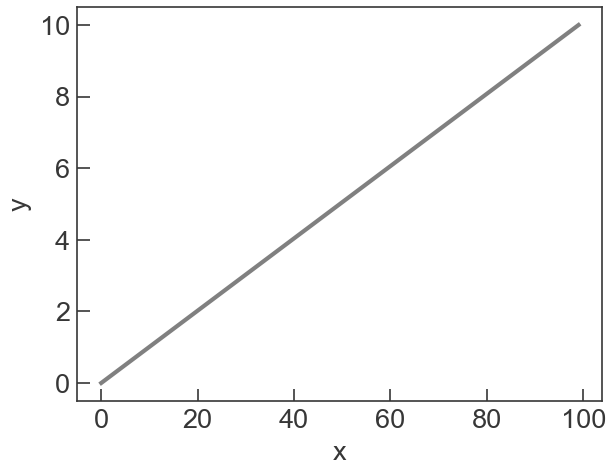

In [10]:
change_to_inline(params_type = 'inline', scale=1) 
# go back to inline backend otherwise display error
plt.close()
plt.tight_layout()
plt.plot(np.linspace(0, 10, 100), color='grey')
plt.xlabel('x')
plt.ylabel('y')

In [12]:
import pyvisa
rm = pyvisa.ResourceManager()

In [14]:
rm.list_resources()

('USB0::0x1AB1::0x099C::DSG8M267M00006::INSTR', 'ASRL1::INSTR', 'ASRL3::INSTR')

In [17]:
inst = rm.open_resource('USB0::0x1AB1::0x099C::DSG8M267M00006::INSTR')

In [18]:
inst.query("*IDN?")

'Rigol Technologies,DSG836,DSG8M267M00006,00.01.07\n'

In [21]:
from confocal_gui.device import DSG836

In [28]:
handle.query('SOURce:Power?')

'-110.00\n'

In [11]:
import nidaqmx, time

In [61]:
with nidaqmx.Task() as task:
    task.ai_channels.add_ai_voltage_chan("Dev1/ai0")
    task.timing.cfg_samp_clk_timing(10.0, sample_mode=nidaqmx.constants.AcquisitionType.FINITE, samps_per_chan=10)
    while 1:
        time.sleep(0.1)
        t0 = time.time()
        data = task.read(nidaqmx.constants.READ_ALL_AVAILABLE)
        #print(time.time()-t0)
        print(data)
        #print(data, end='\r')

[0.030208686449488688, 0.030368590330311716, 0.030208686449488688, 0.030368590330311716, 0.030368590330311716, 0.030208686449488688, 0.030208686449488688, 0.030208686449488688, 0.030208686449488688, 0.030208686449488688]
[0.030368590330311716, 0.030208686449488688, 0.030368590330311716, 0.030208686449488688, 0.030368590330311716, 0.030368590330311716, 0.030368590330311716, 0.030368590330311716, 0.030208686449488688, 0.030048782568745883]
[0.030368590330311716, 0.030368590330311716, 0.030368590330311716, 0.030368590330311716, 0.030368590330311716, 0.030208686449488688, 0.030368590330311716, 0.030368590330311716, 0.030048782568745883, 0.030208686449488688]
[0.030208686449488688, 0.030208686449488688, 0.030208686449488688, 0.030528494211214934, 0.030528494211214934, 0.030528494211214934, 0.030368590330311716, 0.030368590330311716, 0.030368590330311716, 0.030208686449488688]
[0.030208686449488688, 0.030368590330311716, 0.030368590330311716, 0.030208686449488688, 0.030368590330311716, 0.030

KeyboardInterrupt: 

In [12]:
task =  nidaqmx.Task()
task.ai_channels.add_ai_voltage_chan("Dev1/ai0")
task.timing.cfg_samp_clk_timing(1000.0, sample_mode=nidaqmx.constants.AcquisitionType.FINITE, samps_per_chan=1000)


while(1):
    t00 = time.time()
    task.stop()
    task.start()
    t1 = time.perf_counter()
    time.sleep(0.1)
    t0 = time.time()
    data = task.read(nidaqmx.constants.READ_ALL_AVAILABLE)
    print(time.perf_counter()-t1)
    #print(time.time()-t00)
    #print(data)
    #print(data, end='\r')

1.0110930000664666
0.9997023999458179


KeyboardInterrupt: 

In [13]:
task.stop()

In [14]:
task.close()

In [23]:
task is None

False

In [24]:
task.is_task_done()

DaqError: Task specified is invalid or does not exist.
Status Code: -200088

In [9]:
int(1000*0.1523123)

152

In [4]:
counter = USB6346()

In [5]:
counter.exposure

1

In [6]:
import time
t0 = time.time()
counter.read_counts(1, None)
print(time.time()-t0)

1.0468475818634033


In [12]:
float(np.average([1.02, 2.04, 55.2]))

19.42

In [21]:
counter.exit_handler()

In [20]:
counter.task_counter_ai.timing.cfg_samp_clk_timing(1000.0, sample_mode=nidaqmx.constants.AcquisitionType.FINITE, samps_per_chan=1000)

DaqError: Specified property cannot be set while the task is running.
Set the property prior to starting the task, or stop the task prior to setting the property.

Property: DAQmx_SampTimingType

Task Name: _unnamedTask<8>

Status Code: -200557

In [12]:
counter

In [13]:
hasattr(counter, '__bases__')

False

In [15]:
hasattr(counter, '__call__')

False

In [17]:
hasattr(counter.read_counts, '__bases__')

False

In [18]:
hasattr(counter.read_counts, '__call__')

True

In [19]:
config_instances

{'scanner': <confocal_gui.virtual_device.VirtualScanner at 0x18bf5622e40>,
 'counter': <function confocal_gui.virtual_device.virtual_read_counts(duration, parent)>,
 'rf': <confocal_gui.device.DSG836 at 0x18b88c2a270>,
 'laser_stabilizer_core': <confocal_gui.logic.VirtualLaserStabilizerCore at 0x18b88c946e0>,
 'laser_stabilizer': <LaserStabilizer(Thread-3, initial daemon)>,
 'display_scale': 1}

In [7]:
config_instances['counter'] = counter.read_counts

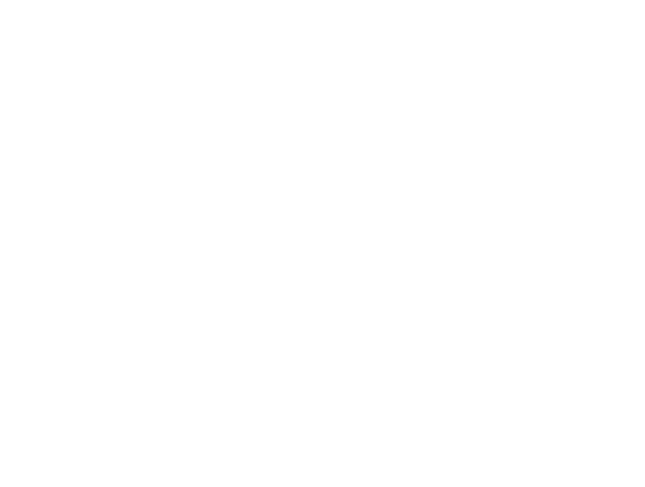

In [10]:
fig, data_figure = live(np.arange(100), exposure=0.1, wavelength=None, 
                                           is_finite=False, config_instances={**config_instances})
# wavelength defines wavelength for live plot

In [7]:
config_instances['counter'](1, None)

0.01783516449266453

In [8]:
rf = config_instances['rf']

In [9]:
rf.frequency

2395000000.0

In [13]:
rf.power = -10

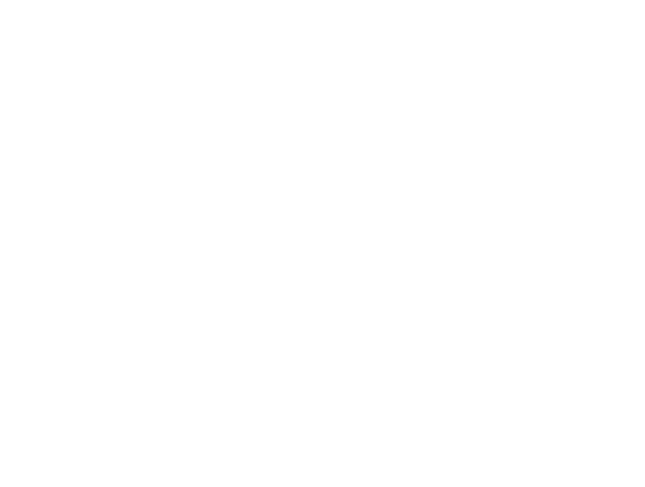

In [22]:
fig, data_figure = odmr(np.arange(2.77e9, 2.97e9, 1e6), exposure=0.1, power=-10, \
                                config_instances={**config_instances})

In [23]:
data_figure.save('odmr_test_ensemble')

saved fig as odmr_test_ensemblePLE2024_12_20_17_26_42.npz


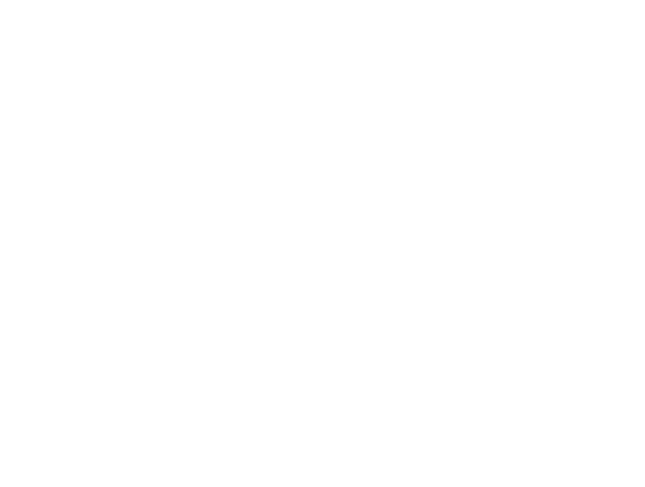

In [24]:
fig, data_figure = odmr(np.arange(2.77e9, 2.97e9, 1e6), exposure=0.1, power=-10, \
                                config_instances={**config_instances})

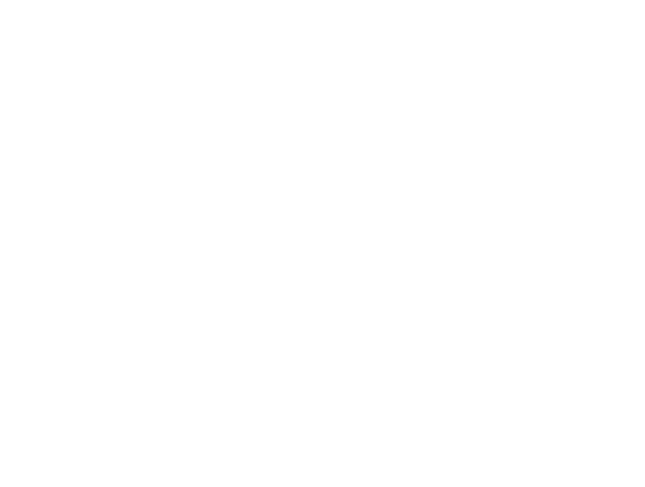

In [27]:
fig, data_figure = odmr(np.arange(2.27e9, 3.47e9, 5e6), exposure=0.1, power=-10, \
                                config_instances={**config_instances})

In [28]:
data_figure.save('odmr_test_ensemble')

saved fig as odmr_test_ensemblePLE2024_12_20_17_33_20.npz


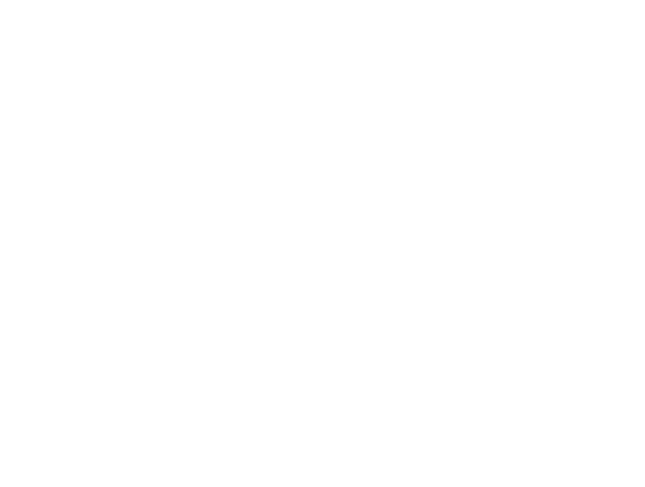

In [16]:
fig, data_figure = odmr(np.arange(2.27e9, 3.47e9, 5e6), exposure=0.1, power=-10, \
                                config_instances={**config_instances})

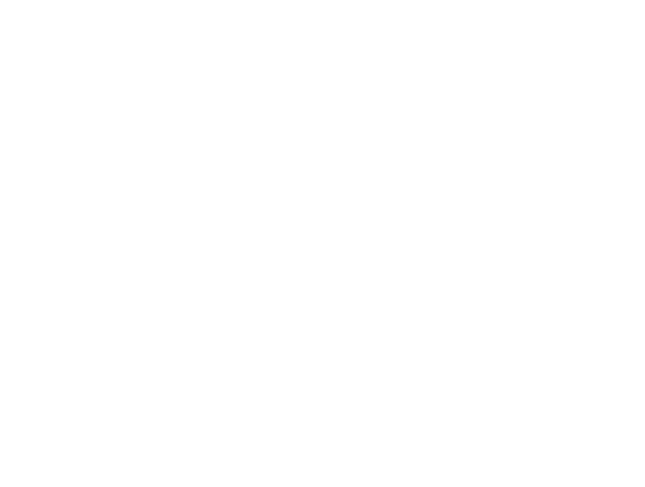

In [17]:
fig, data_figure = odmr(np.arange(2.67e9, 3.07e9, 1e6), exposure=0.1, power=-20, \
                                config_instances={**config_instances})

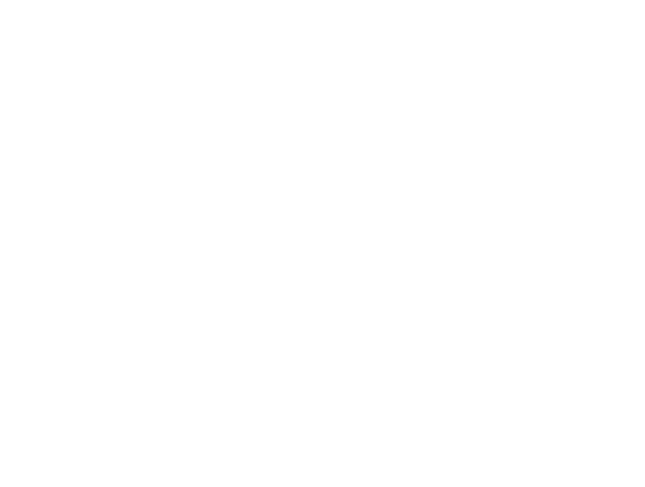

In [18]:
fig, data_figure = odmr(np.arange(2.82e9, 2.92e9, 0.2e6), exposure=0.1, power=-25, \
                                config_instances={**config_instances})

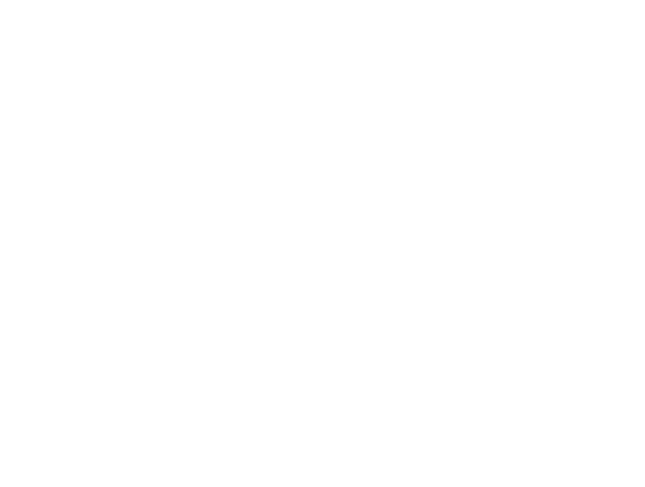

In [19]:
fig, data_figure = odmr(np.arange(2.82e9, 2.92e9, 0.2e6), exposure=0.1, power=-30, \
                                config_instances={**config_instances})

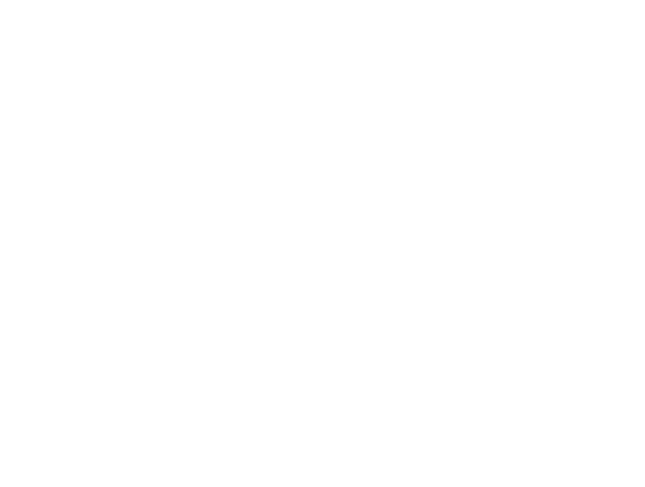

In [20]:
fig, data_figure = odmr(np.arange(2.82e9, 2.92e9, 0.2e6), exposure=0.1, power=-40, \
                                config_instances={**config_instances})

In [1]:
int(100/3)

33